<a href="https://colab.research.google.com/github/JunYear/ML-DL/blob/main/2.%20AI%26ML%20Hands-On/%5BHands_On%5D_Fashion_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()
print(X_train.shape, y_train.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)


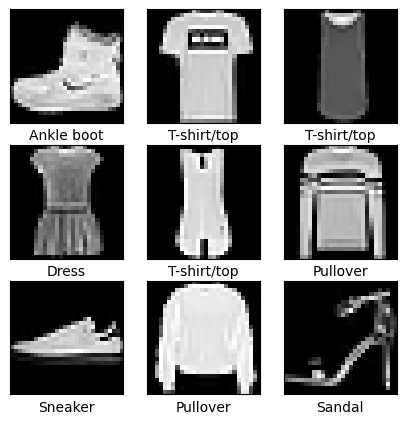

In [3]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[i], cmap='gray')
  plt.xlabel(class_names[y_train[i]])
plt.show()

In [4]:
# 0~1 범위로 만들기
X_train = X_train / 255
X_test = X_test / 255

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.3,
                                                  random_state=777)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

first_model = Sequential()

first_model.add(Flatten(input_shape = (28, 28)))  # (28, 28) -> (28 * 28)
first_model.add(Dense(64, activation='relu')) # 64개층을 가지는 Dense층
first_model.add(Dense(32, activation='relu')) # 32개층을 가지는 Dense층
first_model.add(Dense(10, activation='softmax')) # 10개층을 가지는 신경망

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
first_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['acc'])

first_history = first_model.fit(X_train, y_train,
                                epochs=30,
                                batch_size=128,
                                validation_data = (X_val, y_val))

Epoch 1/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.6687 - loss: 0.9412 - val_acc: 0.8165 - val_loss: 0.5160
Epoch 2/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.8386 - loss: 0.4660 - val_acc: 0.8438 - val_loss: 0.4548
Epoch 3/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8529 - loss: 0.4146 - val_acc: 0.8602 - val_loss: 0.3972
Epoch 4/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8667 - loss: 0.3756 - val_acc: 0.8656 - val_loss: 0.3776
Epoch 5/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8744 - loss: 0.3530 - val_acc: 0.8601 - val_loss: 0.3832
Epoch 6/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8739 - loss: 0.3479 - val_acc: 0.8673 - val_loss: 0.3715
Epoch 7/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8808 - loss: 0.3305 - val_acc: 0.8753 - val_loss: 0.3477
Epoch 8/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8853 - loss: 0.3226 - val_acc: 0.8811 - val_loss: 0.3341
Epoch 9/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - ac

In [7]:
second_model = Sequential()

second_model.add(Flatten(input_shape = (28, 28)))

second_model.add(Dense(128, activation='relu'))

second_model.add(Dense(128, activation='relu'))

second_model.add(Dense(32, activation='relu'))

second_model.add(Dense(10, activation='softmax'))

second_model.compile(optimizer='adam',
                     loss = 'categorical_crossentropy',
                     metrics=['acc'])

second_history = second_model.fit(X_train, y_train,
                                  epochs=30,
                                  batch_size=128,
                                  validation_data=(X_val, y_val))

Epoch 1/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - acc: 0.7142 - loss: 0.8787 - val_acc: 0.8450 - val_loss: 0.4464
Epoch 2/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.8441 - loss: 0.4395 - val_acc: 0.8565 - val_loss: 0.3988
Epoch 3/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - acc: 0.8658 - loss: 0.3786 - val_acc: 0.8643 - val_loss: 0.3848
Epoch 4/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.8762 - loss: 0.3387 - val_acc: 0.8718 - val_loss: 0.3598
Epoch 5/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.8823 - loss: 0.3223 - val_acc: 0.8669 - val_loss: 0.3625
Epoch 6/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.8874 - loss: 0.3092 - val_acc: 0.8742 - val_loss: 0.3446
Epoch 7/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.8950 - loss: 0.2903 - val_acc: 0.8844 - val_loss: 0.3191
Epoch 8/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.8998 - loss: 0.2717 - val_acc: 0.8751 - val_loss: 0.3376
Epoch 9/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - ac

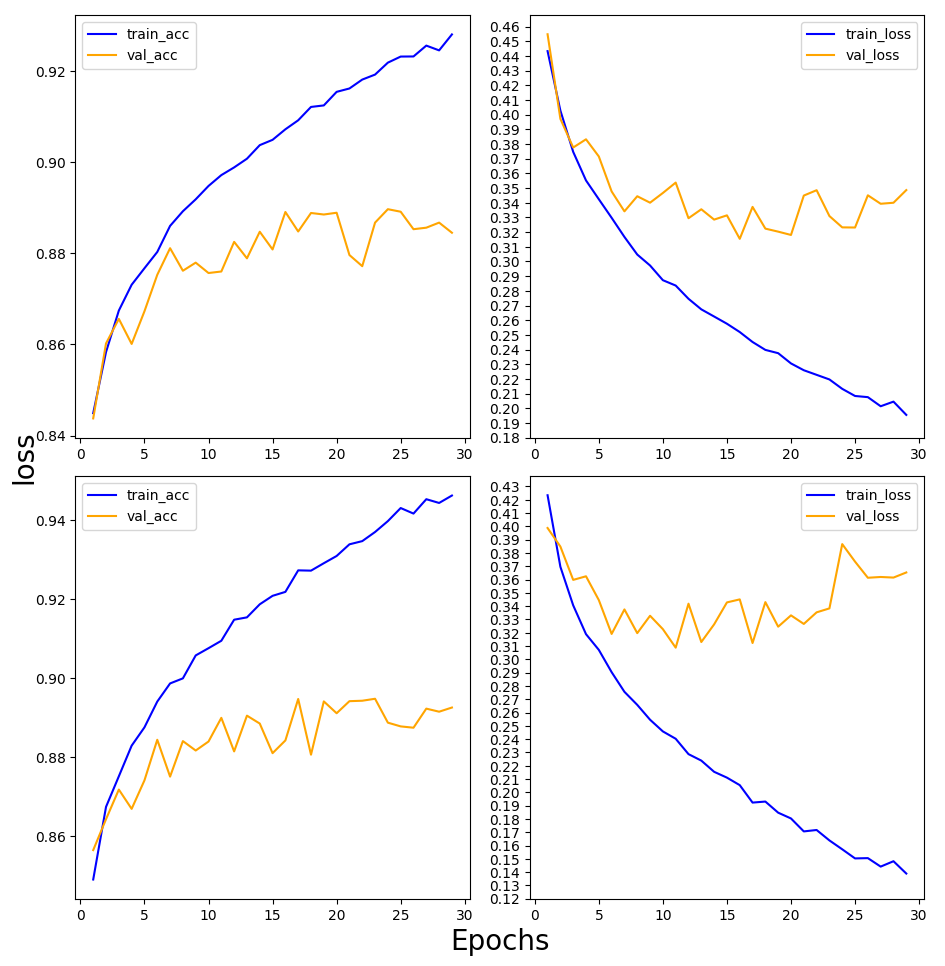

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs):
  his_dict_1 = history_1.history
  his_dict_2 = history_2.history
  keys = list(his_dict_1.keys())

  epochs = range(1, epochs)
  fig = plt.figure(figsize = (10, 10))
  ax = fig.add_subplot(1, 1, 1)

  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_color('none')
  ax.spines['left'].set_color('none')
  ax.spines['right'].set_color('none')
  ax.tick_params(labelcolor='w', top=False,
                 bottom=False, left=False, right=False)

  for i in range(len(his_dict_1)):
    temp_ax = fig.add_subplot(2, 2, i + 1)
    temp = keys[i%2]
    val_temp = keys[(i+2)%2 + 2]
    temp_history = his_dict_1 if i < 2 else his_dict_2
    temp_ax.plot(epochs, temp_history[temp][1:],
                 color = 'blue', label = 'train_' + temp)
    temp_ax.plot(epochs, temp_history[val_temp][1:],
                 color = 'orange', label = val_temp)
    if(i == 1 or i == 3):
      start, end = temp_ax.get_ylim()
      temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
    temp_ax.legend()
  ax.set_ylabel('loss', size=20)
  ax.set_xlabel('Epochs', size=20)
  plt.tight_layout()
  plt.show()

draw_loss_acc(first_history, second_history, 30)